# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Rahman Ilyas Al Kahfi
- **Email:** ilyasalkahfi98@gmail.com
- **ID Dicoding:** kahfii

## Menentukan Pertanyaan Bisnis

- Apa saja 5 kategori produk yang paling sering di beli oleh pelanggan e-commerce?
- Apa saja 5 daerah yang menjadi target pasar potensial di platform e-commerce?
- Di bulan dan tahun berapa e-commerce mencatatkan pendapatan tertinggi dan terendah?
- Pelanggan mana yang menjadi pelanggan terbaik berdasarkan RFM Analysis?

## Import Semua Packages/Library yang Digunakan

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [40]:
df_customers = pd.read_csv("E-Commerce Public Dataset/customers_dataset.csv")
df_customers.head(5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [41]:
df_orders = pd.read_csv("E-Commerce Public Dataset/orders_dataset.csv")
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [42]:
df_order_items = pd.read_csv("E-Commerce Public Dataset/order_items_dataset.csv")
df_order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [43]:
df_product = pd.read_csv("E-Commerce Public Dataset/products_dataset.csv")
df_product.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [44]:
df_product_eng = pd.read_csv("E-Commerce Public Dataset/product_category_name_translation.csv")
df_product_eng.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [45]:
new_order_df = pd.merge(
    left=df_customers,
    right=df_orders,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
).merge(
    right=df_order_items,
    how="inner",
    left_on="order_id",
    right_on="order_id"
).merge(
    right=df_product,
    how="inner",
    left_on="product_id",
    right_on="product_id"
).merge(
    right=df_product_eng,
    how="inner",
    left_on="product_category_name",
    right_on="product_category_name"
)

In [46]:
new_order_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


### Assessing Data

In [47]:
new_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    111023 non-null  object 
 1   customer_unique_id             111023 non-null  object 
 2   customer_zip_code_prefix       111023 non-null  int64  
 3   customer_city                  111023 non-null  object 
 4   customer_state                 111023 non-null  object 
 5   order_id                       111023 non-null  object 
 6   order_status                   111023 non-null  object 
 7   order_purchase_timestamp       111023 non-null  object 
 8   order_approved_at              111009 non-null  object 
 9   order_delivered_carrier_date   109868 non-null  object 
 10  order_delivered_customer_date  108637 non-null  object 
 11  order_estimated_delivery_date  111023 non-null  object 
 12  order_item_id                 

pengecekkan missing value

In [48]:
new_order_df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1155
order_delivered_customer_date    2386
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
product_cate

In [49]:
new_order_df.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111022.000000,111022.000000,111022.000000,111022.000000
mean,35111.280104,1.198229,120.755104,20.025548,48.774533,787.871549,2.209569,2099.897507,30.212210,16.624966,23.042172
std,29854.973997,0.706931,183.372746,15.841472,10.025953,652.169930,1.721428,3754.972723,16.190473,13.468184,11.717712
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11320.000000,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24340.000000,1.000000,74.990000,16.310000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,59020.000000,1.000000,134.900000,21.180000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Cleaning Data

In [50]:
new_order_df["total_price"] = new_order_df["price"] + new_order_df["freight_value"]
new_order_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,total_price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,252.25


In [51]:
customer_state = new_order_df['customer_state'].unique()
print(customer_state)

['SP' 'SC' 'PR' 'MG' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


In [52]:
name_of_state = {
    "AC": "Acre",
"AL" : "Alagoas",
"AM" : "Amazonas",
"AP" : "Amapá",
"BA" : "Bahia",
"CE" : "Ceará",
"DF" : "Distrito Federal",
"ES" : "Espírito Santo",
"GO" : "Goiás",
"MA" : "Maranhão",
"MG" : "Minas Gerais",
"MS" : "Mato Grosso do Sul",
"MT" : "Mato Grosso",
"PA" : "Pará",
"PB" : "Paraíba",
"PE" : "Pernambuco",
"PI" : "Piauí",
"PR" : "Paraná",
"RJ" : "Rio de Janeiro",
"RN" : "Rio Grande do Norte",
"RO" : "Rondônia",
"RR" : "Roraima",
"RS" : "Rio Grande do Sul",
"SC" : "Santa Catarina",
"SE" : "Sergipe",
"SP" : "São Paulo",
"TO" : "Tocantins",
}
new_order_df['customer_state'].replace(name_of_state,inplace=True)
new_order_df.head(5)

C:\Users\Ilyas\AppData\Local\Temp\ipykernel_2344\3310572498.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_order_df['customer_state'].replace(name_of_state,inplace=True)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,total_price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,São Paulo,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,São Paulo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,São Paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,São Paulo,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,São Paulo,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort,252.25


In [53]:
new_order_df["order_purchase_timestamp"] = pd.to_datetime(new_order_df["order_purchase_timestamp"])

new_order_df['date'] = new_order_df['order_purchase_timestamp'].dt.date
new_order_df['time'] = new_order_df['order_purchase_timestamp'].dt.time
new_order_df['year'] = new_order_df['order_purchase_timestamp'].dt.year
new_order_df['month'] = new_order_df['order_purchase_timestamp'].dt.month

new_order_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,total_price,date,time,year,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,São Paulo,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,office_furniture,146.87,2017-05-16,15:05:35,2017,5
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,São Paulo,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,10150.0,89.0,15.0,40.0,housewares,335.48,2018-01-12,20:48:24,2018,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,São Paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,8267.0,52.0,52.0,17.0,office_furniture,157.73,2018-05-19,16:07:45,2018,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,São Paulo,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,12160.0,56.0,51.0,28.0,office_furniture,173.30,2018-03-13,16:06:38,2018,3
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,São Paulo,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,5200.0,45.0,15.0,35.0,home_confort,252.25,2018-07-29,09:51:30,2018,7


In [54]:
order_stat = new_order_df['order_status'].unique()
print(order_stat)

['delivered' 'invoiced' 'shipped' 'processing' 'canceled' 'unavailable'
 'approved']


In [55]:
keep_val = ["delivered"]
new_order_df = new_order_df[new_order_df["order_status"].isin(keep_val)]

In [56]:
order_stat = new_order_df['order_status'].unique()
print(order_stat)

['delivered']


In [57]:
new_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108638 entries, 0 to 111022
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    108638 non-null  object        
 1   customer_unique_id             108638 non-null  object        
 2   customer_zip_code_prefix       108638 non-null  int64         
 3   customer_city                  108638 non-null  object        
 4   customer_state                 108638 non-null  object        
 5   order_id                       108638 non-null  object        
 6   order_status                   108638 non-null  object        
 7   order_purchase_timestamp       108638 non-null  datetime64[ns]
 8   order_approved_at              108624 non-null  object        
 9   order_delivered_carrier_date   108636 non-null  object        
 10  order_delivered_customer_date  108630 non-null  object        
 11  order

In [58]:
drop_col = ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "shipping_limit_date", "product_category_name", "product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm", "seller_id", "order_estimated_delivery_date", "order_item_id", "price", "freight_value", "customer_zip_code_prefix", "order_id", "product_id"]

df_cleaned = new_order_df.drop(columns=drop_col)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108638 entries, 0 to 111022
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    108638 non-null  object        
 1   customer_unique_id             108638 non-null  object        
 2   customer_city                  108638 non-null  object        
 3   customer_state                 108638 non-null  object        
 4   order_status                   108638 non-null  object        
 5   order_purchase_timestamp       108638 non-null  datetime64[ns]
 6   product_category_name_english  108638 non-null  object        
 7   total_price                    108638 non-null  float64       
 8   date                           108638 non-null  object        
 9   time                           108638 non-null  object        
 10  year                           108638 non-null  int32         
 11  month

In [59]:
df_cleaned.to_csv("dashboard/e-commerce_cleaned.csv", index=False)

## Exploratory Data Analysis (EDA)

In [60]:
df_use = pd.read_csv("dashboard/e-commerce_cleaned.csv")

In [61]:
df_use.head(5)

,customer_id,customer_unique_id,customer_city,customer_state,order_status,order_purchase_timestamp,product_category_name_english,total_price,date,time,year,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,São Paulo,delivered,2017-05-16 15:05:35,office_furniture,146.87,2017-05-16,15:05:35,2017,5
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,São Paulo,delivered,2018-01-12 20:48:24,housewares,335.48,2018-01-12,20:48:24,2018,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,São Paulo,delivered,2018-05-19 16:07:45,office_furniture,157.73,2018-05-19,16:07:45,2018,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,São Paulo,delivered,2018-03-13 16:06:38,office_furniture,173.30,2018-03-13,16:06:38,2018,3
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,São Paulo,delivered,2018-07-29 09:51:30,home_confort,252.25,2018-07-29,09:51:30,2018,7


In [62]:
year = df_use.groupby(by='year').agg({
    'year': 'count',
}).rename(columns={"year":"jumlah"}).sort_values(by='jumlah',ascending= False)
year.reset_index(inplace=True)
year.head(5)

,year,jumlah
0,2018,59646
1,2017,48677
2,2016,315


### Explore kategori produk yang banyak dibeli pelanggan di platform e-commerce

In [63]:
category_products = df_use.groupby(by='product_category_name_english').agg({
    'product_category_name_english': 'count',
}).rename(columns={"product_category_name_english":"jumlah"}).sort_values(by='jumlah',ascending= False)
category_products.reset_index(inplace=True)
category_products.head(5)

,product_category_name_english,jumlah
0,bed_bath_table,10953
1,health_beauty,9465
2,sports_leisure,8431
3,furniture_decor,8160
4,computers_accessories,7644


### Explore pendapatan dari pelanggan di platform e-commerce berdasarkan daerah (state)

In [64]:
df_use.groupby(by="customer_state").agg({
    "customer_state": "nunique",
    "total_price": ["max", "min", "mean", "std"]
})

customer_state total_price                               
                           nunique         max    min        mean         std
customer_state                                                               
Acre                             1     1251.70  39.03  218.516742  215.691905
Alagoas                          1     1942.00  25.24  220.997754  258.259287
Amapá                            1     1482.42  34.80  199.281605  230.970672
Amazonas                         1     1853.75  29.65  167.371491  221.453047
Bahia                            1     3048.27  21.99  161.035373  208.831994
Ceará                            1     2734.11  25.43  186.510482  222.130100
Distrito Federal                 1     4194.76  20.04  147.655949  223.900240
Espírito Santo                   1     6922.21  22.04  143.068962  220.511121
Goiás                            1     2220.32  13.27  145.922004  167.462538
Maranhão                         1     2511.75  21.24  184.697585  217.657076
Mato Grosso                      1     2124.78  15.90  175.583776  211.376481
Mato Grosso do Sul               1     6929.31  21.33  166.572993  337.192809
Minas Gerais                     1     4175.26   6.08  141.071587  185.188839
Paraná                           1     3126.50  10.33  138.563309  184.123612
Paraíba                          1     4681.78  29.74  233.567712  350.223583
Pará                             1     2252.66  26.13  194.864802  230.177466
Pernambuco                       1     3792.59  14.38  176.548868  215.089256
Piauí                            1     1816.11  34.80  202.207364  211.315186
Rio Grande do Norte              1     1821.82  34.84  194.082602  232.205421
Rio Grande do Sul                1     3297.40  19.48  140.821365  173.335013
Rio de Janeiro                   1     4950.34   9.56  145.647034  194.256355
Rondônia                         1     2452.12  34.34  210.302397  288.780950
Roraima                          1      994.77  39.03  198.584091  184.711014
Santa Catarina                   1     3209.72  14.24  145.427357  200.336724
Sergipe                          1     1729.98  30.97  187.844745  207.561963
São Paulo                        1     6726.66   7.28  124.355822  168.430807
Tocantins                        1     2784.16  26.13  194.386013  268.840434

In [65]:
total_revenue_per_state = df_use.groupby('customer_state')['total_price'].sum()

top_5_states = total_revenue_per_state.sort_values(ascending=False).head(5)

top_5_states.head(5)


customer_state
São Paulo            5697113.29
Rio de Janeiro       2028571.89
Minas Gerais         1796405.59
Rio Grande do Sul     850279.40
Paraná                772074.76
Name: total_price, dtype: float64

### Explore pendapatan dari pelanggan di platform e-commerce berdasarkan bulan dan tahun

In [66]:
monthly_sales = df_cleaned.groupby(['year', 'month'])['total_price'].sum().reset_index()

monthly_sales['period'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

print(monthly_sales)

    year  month  total_price     period
0   2016      9       143.46 2016-09-01
1   2016     10     46394.74 2016-10-01
2   2016     12        19.62 2016-12-01
3   2017      1    125683.64 2017-01-01
4   2017      2    261694.98 2017-02-01
5   2017      3    406871.63 2017-03-01
6   2017      4    380615.96 2017-04-01
7   2017      5    554208.03 2017-05-01
8   2017      6    484095.06 2017-06-01
9   2017      7    562456.67 2017-07-01
10  2017      8    639629.63 2017-08-01
11  2017      9    694003.62 2017-09-01
12  2017     10    733050.47 2017-10-01
13  2017     11   1137526.60 2017-11-01
14  2017     12    825707.25 2017-12-01
15  2018      1   1053965.48 2018-01-01
16  2018      2    951341.13 2018-02-01
17  2018      3   1101474.76 2018-03-01
18  2018      4   1123553.90 2018-04-01
19  2018      5   1122746.04 2018-05-01
20  2018      6   1009172.59 2018-06-01
21  2018      7   1021408.04 2018-07-01
22  2018      8    980656.61 2018-08-01


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja 5 kategori produk yang paling sering di beli oleh pelanggan e-commerce?

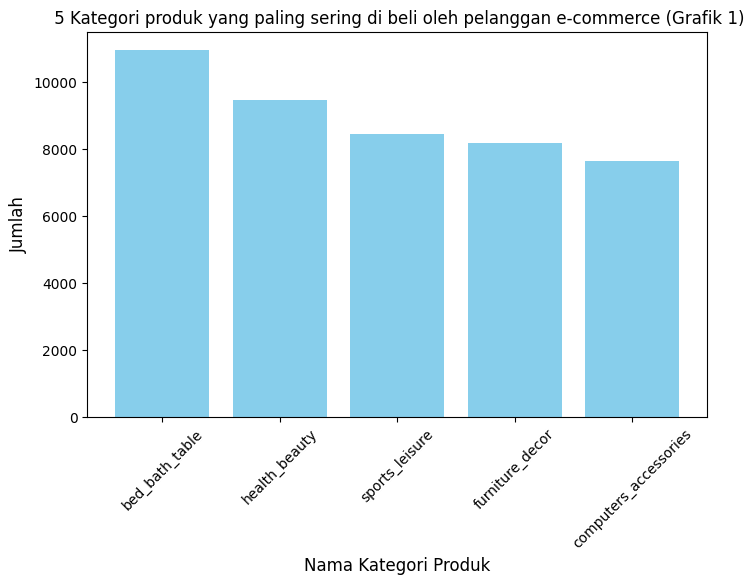

In [67]:
plt.figure(figsize=(8, 5))
plt.bar(category_products['product_category_name_english'].head(5), category_products['jumlah'].head(5), color='skyblue')

plt.xlabel('Nama Kategori Produk', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title(' 5 Kategori produk yang paling sering di beli oleh pelanggan e-commerce (Grafik 1)', fontsize=12)
plt.xticks(rotation=45) 

plt.show()


### Pertanyaan 2: Apa saja 5 daerah yang menjadi target pasar potensial di platform e-commerce?

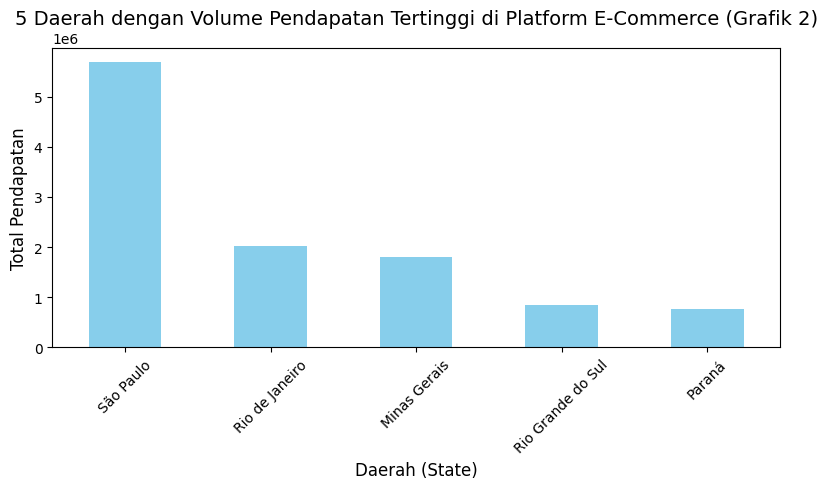

In [68]:
top_5_states.plot(kind='bar', color='skyblue', figsize=(8, 5))

plt.title('5 Daerah dengan Volume Pendapatan Tertinggi di Platform E-Commerce (Grafik 2)', fontsize=14)
plt.xlabel('Daerah (State)', fontsize=12)
plt.ylabel('Total Pendapatan', fontsize=12)

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

### Pertanyaan 3: Di bulan dan tahun berapa e-commerce mencatatkan pendapatan tertinggi dan terendah?

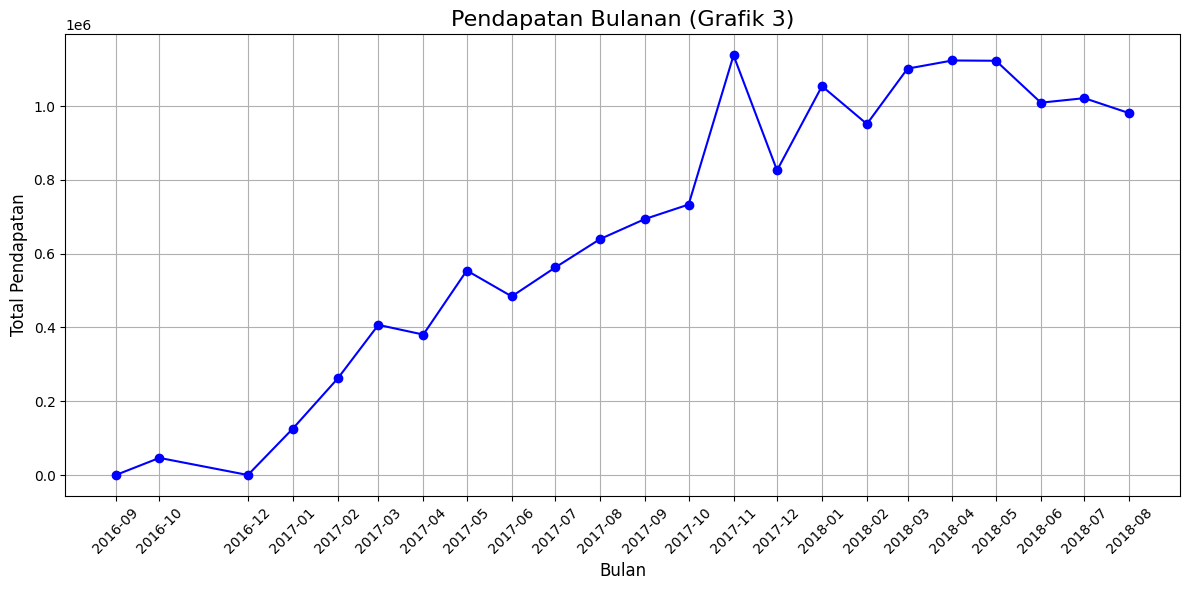

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['period'], monthly_sales['total_price'], marker='o', linestyle='-', color='blue')

plt.title('Pendapatan Bulanan (Grafik 3)', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Pendapatan', fontsize=12)

plt.xticks(ticks=monthly_sales['period'], labels=monthly_sales['period'].dt.strftime('%Y-%m'), rotation=45)

plt.grid(True)

plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [70]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108638 entries, 0 to 108637
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    108638 non-null  object 
 1   customer_unique_id             108638 non-null  object 
 2   customer_city                  108638 non-null  object 
 3   customer_state                 108638 non-null  object 
 4   order_status                   108638 non-null  object 
 5   order_purchase_timestamp       108638 non-null  object 
 6   product_category_name_english  108638 non-null  object 
 7   total_price                    108638 non-null  float64
 8   date                           108638 non-null  object 
 9   time                           108638 non-null  object 
 10  year                           108638 non-null  int64  
 11  month                          108638 non-null  int64  
dtypes: float64(1), int64(2), objec

In [71]:
df = df_use

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

reference_date = df['order_purchase_timestamp'].max()


rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'customer_id': 'count',  # Frequency
    'total_price': 'sum'  # Monetary
}).reset_index()

rfm.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'customer_id': 'Frequency',
    'total_price': 'Monetary'
}, inplace=True)

print(rfm)

                     customer_unique_id  Recency  Frequency  Monetary
0      0000366f3b9a7992bf8c76cfdf3221e2      111          1    141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f      114          1     27.19
2      0000f46a3911fa3c0805444483337064      536          1     86.22
3      0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62
4      0004aac84e0df4da2b147fca70cf8255      287          1    196.89
...                                 ...      ...        ...       ...
92074  fffcf5a5ff07b0908bd4e2dbc735a684      446          2   2067.42
92075  fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58
92076  ffff371b4d645b6ecea244b27531430a      567          1    112.46
92077  ffff5962728ec6157033ef9805bacc48      118          1    133.69
92078  ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56

[92079 rows x 4 columns]


In [72]:
rfm_sorted_R = rfm.sort_values("Recency")
print(rfm_sorted_R)

                     customer_unique_id  Recency  Frequency  Monetary
46102  7febafa06d9d8f232a900a2937f04338        0          1     61.29
32128  58ffbb506c34ffb731c99595589a4ebe        0          1     38.37
82668  e58697e3a253c253e1582f8c4f4c54ff        0          2    185.82
12267  21dbe8eabd00b34492a939c540e2b1a7        0          1     14.29
24805  44d111bdc55faca551ef91cb74a444d8        0          1    259.81
...                                 ...      ...        ...       ...
86923  f176923a0a4ab546c7287791ccb82193      694          2    101.44
73166  cb1bc069e25d9c59773c85a2e2a46713      694          1    267.49
80424  df2988ba3ed226b10521a0e4da849b61      694          1     86.88
2976   0829f7df6577d5a4b65439bea701405f      694          1    267.49
47229  830d5b7aaa3b6f1e9ad63703bec97d23      713          3    143.46

[92079 rows x 4 columns]


In [73]:
rfm_sorted_F = rfm.sort_values("Frequency", ascending=False)
print(rfm_sorted_F)

                     customer_unique_id  Recency  Frequency  Monetary
72147  c8460e4251689ba205045f3ea17884a1       21         24   4655.88
24964  4546caea018ad8c692964e3382debd19      408         21    196.17
70607  c402f431464c72e27330a67f7b94d4fb      187         20   2202.40
38056  698e1cf81d01a3d389d96145f7fa6df8      371         20   2262.80
5554   0f5ac8d5c31de21d2f25e24be15bbffb      275         18   1544.82
...                                 ...      ...        ...       ...
32650  5a6cda86d79e1ed11d38881398f56c59      522          1     84.16
32649  5a6cd8797286a15f0bf2fb97f024781c      104          1     21.39
32648  5a6bc06cb2b6634abf6db687a6523436      563          1    174.28
32645  5a6a43b78f4354c6bf999401fba32452      468          1    233.68
92078  ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56

[92079 rows x 4 columns]


In [74]:
rfm_sorted_M = rfm.sort_values("Monetary", ascending=False)
print(rfm_sorted_M)

                     customer_unique_id  Recency  Frequency  Monetary
3676   0a0a92112bd4c708ca5fde585afaa872      333          8  13664.08
78561  da122df9eeddfedc1dc1f5349a1a690c      514          2   7571.63
42571  763c8b1c9c68a0229c42c9fc6f662b93       45          4   7274.88
79376  dc4802a71eae9be1dd28f5d788ceb526      562          1   6929.31
25089  459bef486812aa25204be022145caa62       34          1   6922.21
...                                 ...      ...        ...       ...
14600  2878e5b88167faab17d4fb83a986d38b      303          1     11.63
40136  6f5b9d1cdccc4d28f0483a612edecacf      360          1     11.63
64584  b33336f46234b24a613ad9064d13106d       68          1     10.89
68101  bd06ce0e06ad77a7f681f1a4960a3cc6      349          1     10.07
17854  317cfc692e3f86c45c95697c61c853a6        3          1      9.59

[92079 rows x 4 columns]


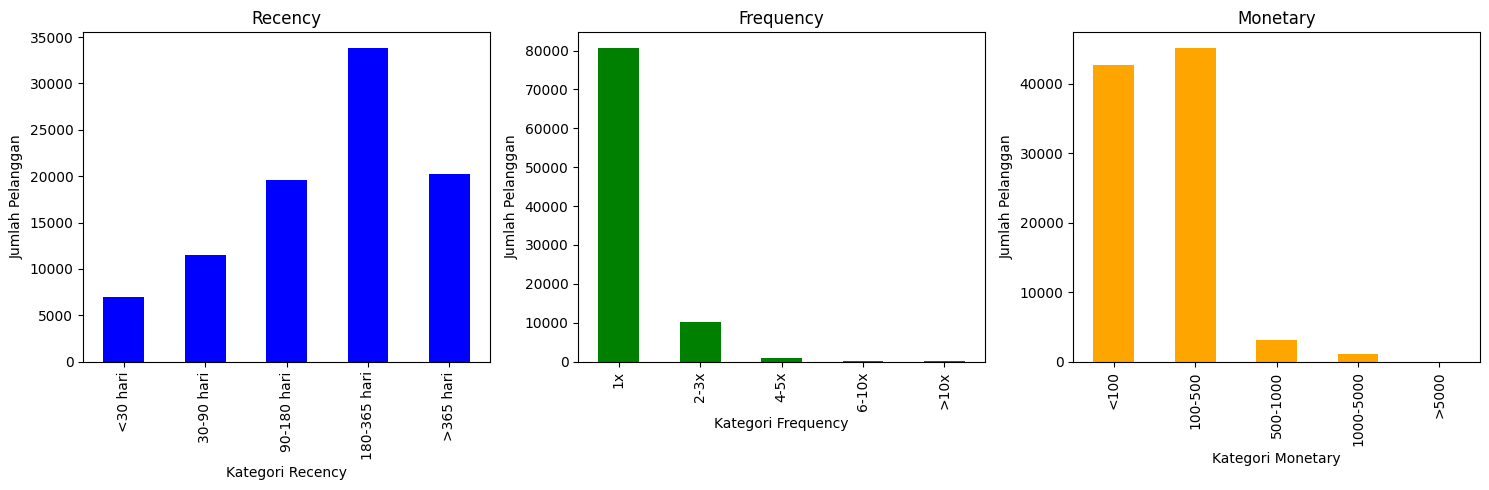

In [75]:

rfm['Recency_Category'] = pd.cut(rfm['Recency'], bins=[0, 30, 90, 180, 365, rfm['Recency'].max()],
                                  labels=['<30 hari', '30-90 hari', '90-180 hari', '180-365 hari', '>365 hari'])
rfm['Frequency_Category'] = pd.cut(rfm['Frequency'], bins=[0, 1, 3, 5, 10, rfm['Frequency'].max()],
                                    labels=['1x', '2-3x', '4-5x', '6-10x', '>10x'])
rfm['Monetary_Category'] = pd.cut(rfm['Monetary'], bins=[0, 100, 500, 1000, 5000, rfm['Monetary'].max()],
                                   labels=['<100', '100-500', '500-1000', '1000-5000', '>5000'])

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
rfm['Recency_Category'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Recency')
plt.xlabel('Kategori Recency')
plt.ylabel('Jumlah Pelanggan')

plt.subplot(1, 3, 2)
rfm['Frequency_Category'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Frequency')
plt.xlabel('Kategori Frequency')
plt.ylabel('Jumlah Pelanggan')

plt.subplot(1, 3, 3)
rfm['Monetary_Category'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Monetary')
plt.xlabel('Kategori Monetary')
plt.ylabel('Jumlah Pelanggan')

plt.tight_layout()
plt.show()

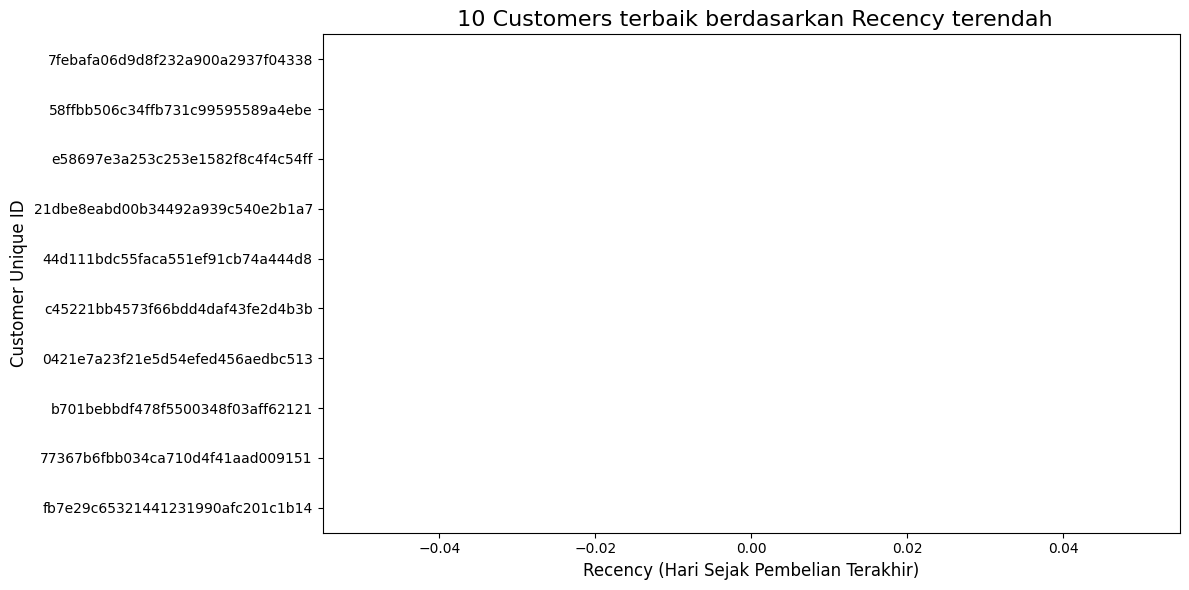

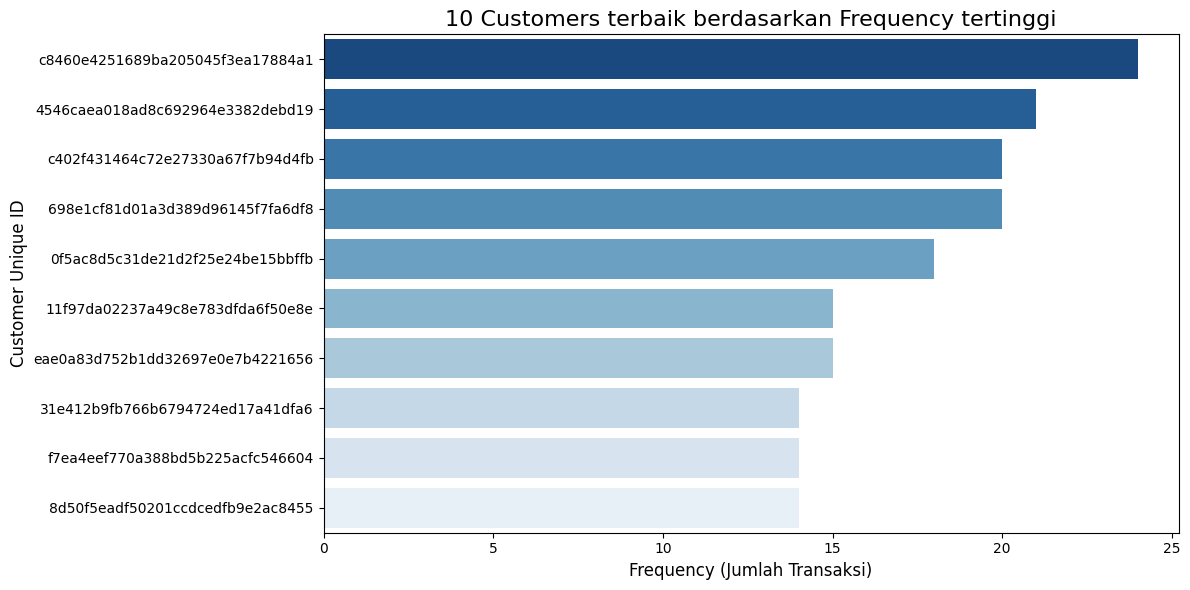

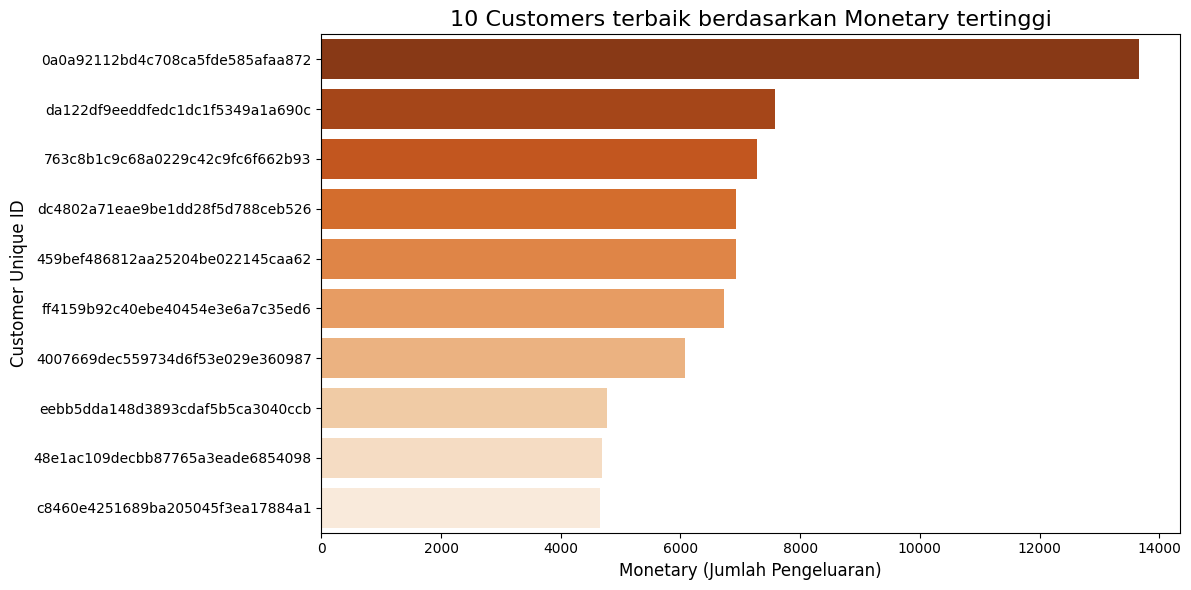

In [76]:

top_recency = rfm.sort_values(by="Recency", ascending=True).head(10)

top_frequency = rfm.sort_values(by="Frequency", ascending=False).head(10)

top_monetary = rfm.sort_values(by="Monetary", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Recency", 
    y="customer_unique_id", 
    data=top_recency, 
    hue="customer_unique_id", 
    palette="Blues_r", 
    legend=False
)
plt.title(" 10 Customers terbaik berdasarkan Recency terendah", fontsize=16)
plt.xlabel("Recency (Hari Sejak Pembelian Terakhir)", fontsize=12)
plt.ylabel("Customer Unique ID", fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Frequency", 
    y="customer_unique_id", 
    data=top_frequency, 
    hue="customer_unique_id", 
    palette="Blues_r", 
    legend=False
)
plt.title("10 Customers terbaik berdasarkan Frequency tertinggi", fontsize=16)
plt.xlabel("Frequency (Jumlah Transaksi)", fontsize=12)
plt.ylabel("Customer Unique ID", fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Monetary", 
    y="customer_unique_id", 
    data=top_monetary, 
    hue="customer_unique_id", 
    palette="Oranges_r", 
    legend=False
)
plt.title("10 Customers terbaik berdasarkan Monetary tertinggi", fontsize=16)
plt.xlabel("Monetary (Jumlah Pengeluaran)", fontsize=12)
plt.ylabel("Customer Unique ID", fontsize=12)
plt.tight_layout()
plt.show()

## Conclusion

1. Apa saja 5 kategori produk yang paling sering di beli oleh pelanggan e-commerce?

- Pada grafik 1 dapat dilihat 5 katergori yang paling sering dibeli oleh pelanggan e-commerce. Kategori **bed_bath_table** memiliki jumlah pembelian tertinggi, diikuti oleh **health_beauty**, **furniture_decor**, **sports_leisure**, dan terakhir **computers_accessories**. 

2. Apa saja 5 daerah yang menjadi target pasar potensial di platform e-commerce?

- Pada grafik 2 menunjukkan 5 daerah dengan volume pendapatan tertinggi di platform e-commerce. Daerah **SP (São Paulo)** mendominasi dengan pendapatan tertinggi, diikuti oleh **RJ (Rio de Janeiro)** dan **MG (Minas Gerais)**. Sementara itu, daerah **RS (Rio Grande do Sul)** dan **PR (Paraná)** memiliki volume pendapatan yang lebih rendah dibandingkan tiga daerah teratas.

3. Di bulan dan tahun berapa e-commerce mencatatkan pendapatan tertinggi dan terendah?

- Pada grafik 3 menunjukkan pendapatan terendah pada platform e-commerce didapatkan pada bulan ke **12 - 2016 (Desember 2016)** sedangkan pendapatan tertinggi pada platfrom e-commerce didapatkan pada bulan ke **11 - 2017 (November 2017)**

4. Pelanggan mana yang menjadi pelanggan terbaik berdasarkan RFM Analysis?

- berdasarkan **Recency**, pelanggan dengan **customer_unique_id 7febafa06d9d8f232a900a2937f04338** menjadi salah satu pelanggan terbaik dengan 0 Hari sejak terakhir kali pelanggan melakukan pembelian pada platform e-commerce.
- berdasarkan **Frequency**, pelanggan dengan **customer_unique_id c8460e4251689ba205045f3ea17884a1** menjadi pelanggan terbaik dengan jumlah total transaksi 24 kali  yang dilakukan pada platform e-commerce.
- berdasarkan **Monetary**, pelanggan dengan **customer_unique_id 0a0a92112bd4c708ca5fde585afaa872** menjadi pelanggan terbaik dengan jumlah total pengeluaran pelanggan sebanyak 13664.08 pada platform e-commerce.